<a href="https://colab.research.google.com/github/KevinDC593-PRO/Tareas/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [37]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error)  # Métricas de evaluación

# Algoritmo k-NN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [26]:
url = "https://raw.githubusercontent.com/KevinDC593-PRO/Tareas/main/dataset_personajes_ficticio_520.xlsx"
df = pd.read_excel(url)

# Escalamos SOLO columnas numéricas (dejamos texto/IDs/clases sin tocar)
cols_num = df.select_dtypes(include=["int64", "float64"]).columns

# Variables
cols_num = df.select_dtypes(include=["int64", "float64"]).columns
X = df[cols_num]
y = df["clase"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df.head()

,id,personaje,franquicia,clase,ataque,defensa,velocidad,poder_especial,resistencia,agilidad,inteligencia,carisma,rango
0,1,Ryu,Street Fighter,Tirador,72,64,86,50,57,86,57,65,68
1,2,Ken Masters,Street Fighter,Guerrero,89,81,76,80,81,66,64,46,80
2,3,Chun-Li,Street Fighter,Tirador,80,57,72,79,65,81,56,71,72
3,4,Guile,Street Fighter,Tanque,63,93,74,61,88,43,66,72,72
4,5,Cammy,Street Fighter,Tanque,53,83,61,72,96,44,62,59,69



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


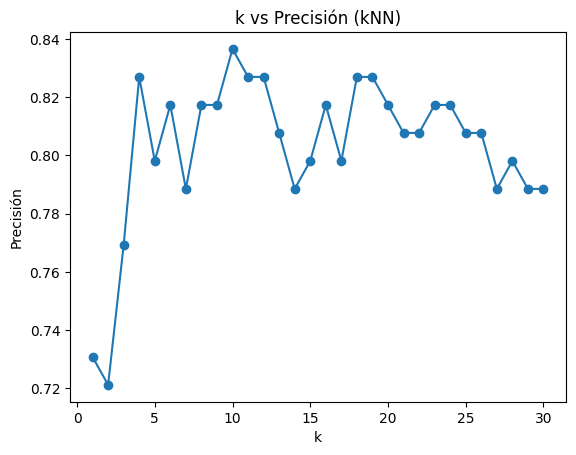

k óptimo: 10


In [27]:
k_vals = range(1, 31)
accs = []

for k in k_vals:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))

plt.plot(list(k_vals), accs, marker='o')
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("k vs Precisión (kNN)")
plt.show()

k_opt = list(k_vals)[accs.index(max(accs))]
print("k óptimo:", k_opt)



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [28]:
# Entrenar el modelo con el valor de k seleccionado
modelo = KNeighborsClassifier(n_neighbors=k_opt)
modelo.fit(X_train, y_train)

# Evaluación con el conjunto de prueba
y_pred = modelo.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.84
Matriz de confusión:
[[16  0  0  0  0  4]
 [ 0 23  0  0  0  1]
 [ 0  1 13  1  0  0]
 [ 0  1  3  8  0  0]
 [ 0  1  0  0 15  0]
 [ 3  1  1  0  0 12]]
Reporte de clasificación:
              precision    recall  f1-score   support

     Asesino       0.84      0.80      0.82        20
    Guerrero       0.85      0.96      0.90        24
        Mago       0.76      0.87      0.81        15
     Soporte       0.89      0.67      0.76        12
      Tanque       1.00      0.94      0.97        16
     Tirador       0.71      0.71      0.71        17

    accuracy                           0.84       104
   macro avg       0.84      0.82      0.83       104
weighted avg       0.84      0.84      0.84       104



---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [35]:
url = "https://raw.githubusercontent.com/KevinDC593-PRO/Tareas/main/dataset_personajes_ficticio_520.xlsx"
df = pd.read_excel(url)

# Columnas numéricas
cols_num = df.select_dtypes(include=["int64", "float64"]).columns

# Variables (REGRESIÓN)
X = df[cols_num].drop(columns=["rango"])
y = df["rango"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df.head()


,id,personaje,franquicia,clase,ataque,defensa,velocidad,poder_especial,resistencia,agilidad,inteligencia,carisma,rango
0,1,Ryu,Street Fighter,Tirador,72,64,86,50,57,86,57,65,68
1,2,Ken Masters,Street Fighter,Guerrero,89,81,76,80,81,66,64,46,80
2,3,Chun-Li,Street Fighter,Tirador,80,57,72,79,65,81,56,71,72
3,4,Guile,Street Fighter,Tanque,63,93,74,61,88,43,66,72,72
4,5,Cammy,Street Fighter,Tanque,53,83,61,72,96,44,62,59,69



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


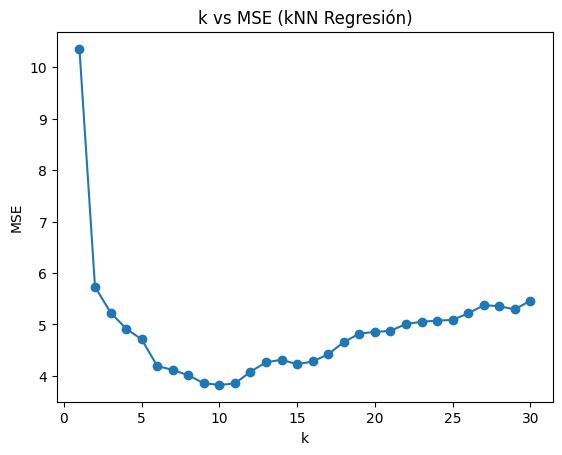

k óptimo: 10


In [36]:
# Determinación del valor de k (kNN - Regresión)
k_vals = range(1, 31)
mses = []

for k in k_vals:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mses.append(mean_squared_error(y_test, y_pred))

# Gráfica k vs MSE
plt.plot(list(k_vals), mses, marker='o')
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("k vs MSE (kNN Regresión)")
plt.show()

# Selección del mejor k (mínimo MSE)
k_opt = list(k_vals)[mses.index(min(mses))]
print("k óptimo:", k_opt)



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [38]:
# Entrenamiento del modelo con k óptimo (Regresión)
modelo = KNeighborsRegressor(n_neighbors=k_opt)
modelo.fit(X_train, y_train)

# Evaluación con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", round(mse, 2))


Error cuadrático medio (MSE): 3.82
